# Predicting the Price for Airbnb Listings in Seattle from House Layout and Quality of Host

### Introduction: 
Airbnb is an affordable accommodation option to consider during travelling within Seattle. Travellers tend to use the airbnb as a place to rest after a long day of sightseeing, hence the house layout is important to them to ensure a comfortable rest. Travellers also require good communication and 'knowledge' of the airbnb host to clear any suspicions.

Hence we would be implementing a regression machine learning project to predict the price for airbnb listings in Seattle from the house layout and the quality of host.

House Layout : Accommodates, Bathrooms, Bedrooms, Beds

Quality of Host : Host_response_rate, Host_acceptance_rate, Number_of_reviews, Review_scores_rating

**Group Name:** GeekHub

**Tutorial Group:**
MA3

**Members:** Chye Zong Yi Eugene (U1821852D), Lim Li Rong Lionel (U1821149H)
                
**Dataset 1:** AirBnB Open Data from Seattle

In [1]:
#Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt #only need py plot
sb.set() #set the graphics for seaborn

# Part 1: Cleaning the Dataset

In [2]:
#read the csv file for listings and convert to dataframe
listings = pd.read_csv("listings.csv")
listings.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


In [3]:
#check for duplicates, if no duplicates, id column is unique hence True
listings['id'].is_unique

True

In [4]:
#extract out the data needed
listingclean = pd.DataFrame(listings[['host_response_rate','host_acceptance_rate',
'accommodates','bathrooms', 'bedrooms', 'beds', 'number_of_reviews', 'review_scores_rating', 'price']])

listingclean.head()

,host_response_rate,host_acceptance_rate,accommodates,bathrooms,bedrooms,beds,number_of_reviews,review_scores_rating,price
0,96%,100%,4,1.0,1.0,1.0,207,95.0,$85.00
1,98%,100%,4,1.0,1.0,1.0,43,96.0,$150.00
2,67%,100%,11,4.5,5.0,7.0,20,97.0,$975.00
3,NaN,NaN,3,1.0,0.0,2.0,0,NaN,$100.00
4,100%,NaN,6,2.0,3.0,3.0,38,92.0,$450.00


In [5]:
#datatypes of columns
listingclean.dtypes

host_response_rate       object
host_acceptance_rate     object
accommodates              int64
bathrooms               float64
bedrooms                float64
beds                    float64
number_of_reviews         int64
review_scores_rating    float64
price                    object
dtype: object

In [6]:
listingclean['price'] = listingclean['price'].str.replace('$', '') #remove $ sign
listingclean['price'] = listingclean['price'].str.replace(',', '') #remove , for price
listingclean['price'] = pd.to_numeric(listingclean['price'] ) #Change datatype of string to float64 

listingclean['host_acceptance_rate'] = listingclean['host_acceptance_rate'].str.replace("%", "").astype("float") #Change datatype of string to float64 
listingclean['host_response_rate'] = listingclean['host_response_rate'].str.replace("%", "").astype("float") #Change datatype of string to float64 

<ipython-input-6-49882235f30f>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  listingclean['price'] = listingclean['price'].str.replace('$', '') #remove $ sign


In [7]:
# datatype sucessfully converted to the right datatypes
listingclean.dtypes

host_response_rate      float64
host_acceptance_rate    float64
accommodates              int64
bathrooms               float64
bedrooms                float64
beds                    float64
number_of_reviews         int64
review_scores_rating    float64
price                   float64
dtype: object

In [8]:
#columns that have null values and how many
listingclean.isnull().sum()

host_response_rate      523
host_acceptance_rate    773
accommodates              0
bathrooms                16
bedrooms                  6
beds                      1
number_of_reviews         0
review_scores_rating    647
price                     0
dtype: int64

In [9]:
#fill null values as 0 
listingclean.fillna(0, inplace=True)

In [10]:
listingclean.isnull().sum() #recheck for any missing values ##data is ready

host_response_rate      0
host_acceptance_rate    0
accommodates            0
bathrooms               0
bedrooms                0
beds                    0
number_of_reviews       0
review_scores_rating    0
price                   0
dtype: int64

In [11]:
listingclean

,host_response_rate,host_acceptance_rate,accommodates,bathrooms,bedrooms,beds,number_of_reviews,review_scores_rating,price
0,96.0,100.0,4,1.0,1.0,1.0,207,95.0,85.0
1,98.0,100.0,4,1.0,1.0,1.0,43,96.0,150.0
2,67.0,100.0,11,4.5,5.0,7.0,20,97.0,975.0
3,0.0,0.0,3,1.0,0.0,2.0,0,0.0,100.0
4,100.0,0.0,6,2.0,3.0,3.0,38,92.0,450.0
...,...,...,...,...,...,...,...,...,...
3813,99.0,100.0,6,2.0,3.0,3.0,1,80.0,359.0
3814,100.0,100.0,4,1.0,1.0,2.0,2,100.0,79.0
3815,0.0,0.0,2,1.0,1.0,1.0,0,0.0,93.0
3816,100.0,0.0,2,1.0,0.0,1.0,0,0.0,99.0


In [12]:
listingclean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   host_response_rate    3818 non-null   float64
 1   host_acceptance_rate  3818 non-null   float64
 2   accommodates          3818 non-null   int64  
 3   bathrooms             3818 non-null   float64
 4   bedrooms              3818 non-null   float64
 5   beds                  3818 non-null   float64
 6   number_of_reviews     3818 non-null   int64  
 7   review_scores_rating  3818 non-null   float64
 8   price                 3818 non-null   float64
dtypes: float64(7), int64(2)
memory usage: 268.6 KB


In [13]:
print('Data Types', type(listingclean))
print("Data Dimentions", listingclean.shape)

Data Types <class 'pandas.core.frame.DataFrame'>
Data Dimentions (3818, 9)


In [14]:
#statistics of data
listingclean.describe()

,host_response_rate,host_acceptance_rate,accommodates,bathrooms,bedrooms,beds,number_of_reviews,review_scores_rating,price
count,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000
mean,81.888947,79.727606,3.349398,1.254191,1.305657,1.734940,22.223415,78.518596,127.976166
std,34.441009,40.208120,1.977599,0.594724,0.884219,1.139677,37.730892,35.979061,90.250022
min,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000
25%,88.000000,100.000000,2.000000,1.000000,1.000000,1.000000,2.000000,87.000000,75.000000
50%,100.000000,100.000000,3.000000,1.000000,1.000000,1.000000,9.000000,95.000000,100.000000
75%,100.000000,100.000000,4.000000,1.000000,2.000000,2.000000,26.000000,98.000000,150.000000
max,100.000000,100.000000,16.000000,8.000000,7.000000,15.000000,474.000000,100.000000,1000.000000


# Part 2: Explore the Data

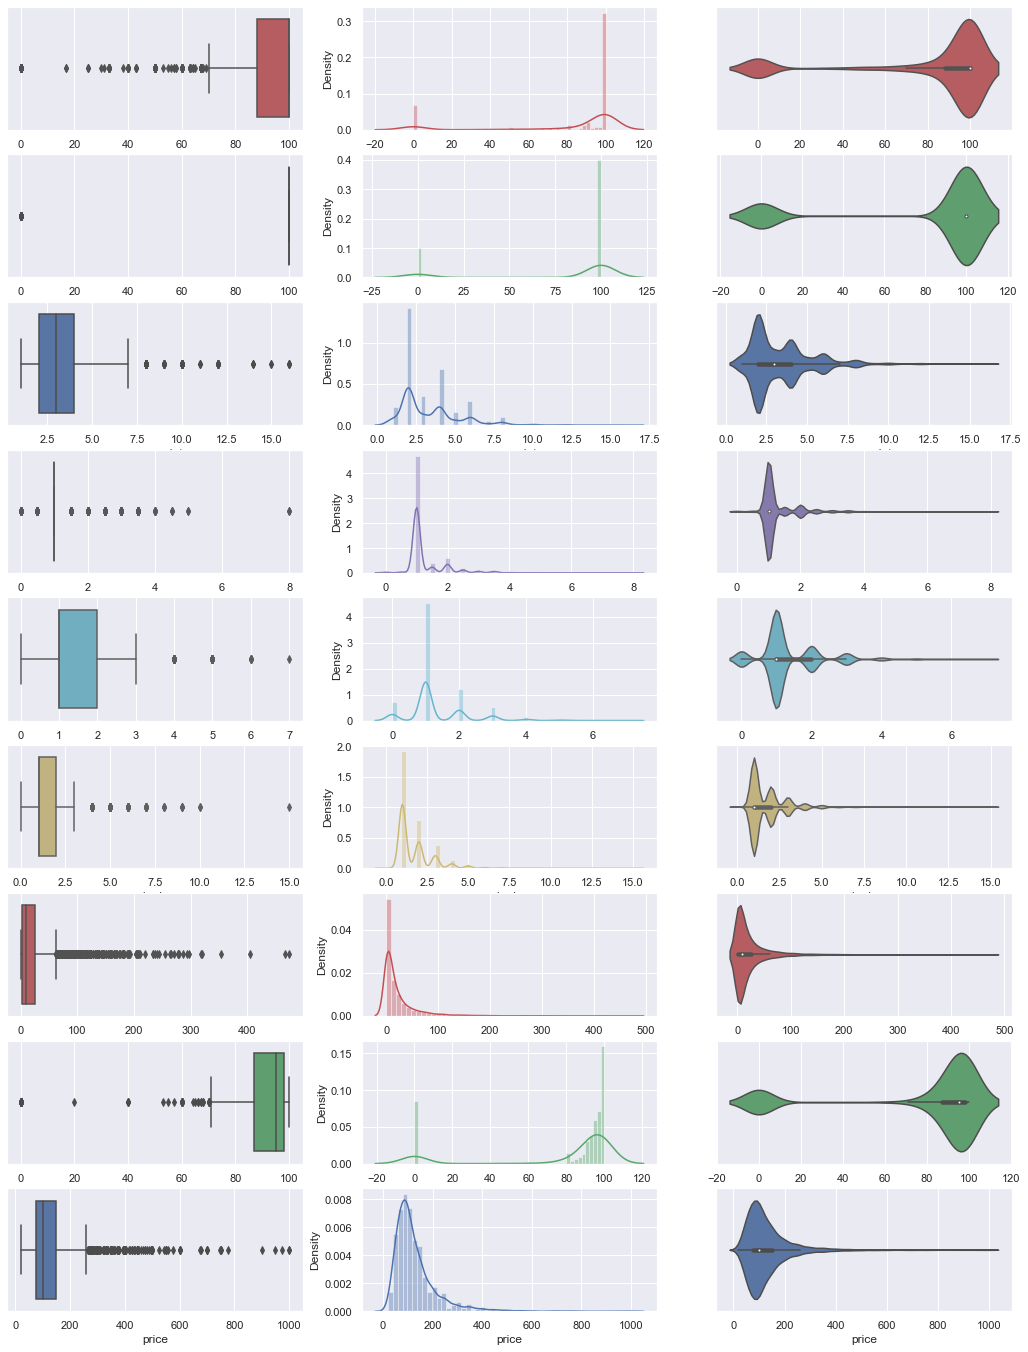

In [15]:
#ignore the warnings
import warnings 
warnings.simplefilter(action="ignore", category=FutureWarning)

# Draw the graphs(boxplot,distplot,violinplot) for each variable in the data for listingclean
f,axes = plt.subplots(9,3, figsize = (18,24))
colors = ["r", "g", "b", "m", "c","y" ,"r","g","b"]

count = 0
for variation in listingclean:
    sb.boxplot(listingclean[variation], orient = "h", color = colors[count], ax=axes[count,0])
    sb.distplot(listingclean[variation], color = colors[count], ax=axes[count,1] )
    sb.violinplot(listingclean[variation], orient = "h", color = colors[count], ax = axes[count,2])
    count += 1

In [16]:
#how skew is each variable
listingclean.skew()

host_response_rate     -1.788266
host_acceptance_rate   -1.479462
accommodates            1.695584
bathrooms               2.820783
bedrooms                1.533884
beds                    2.474715
number_of_reviews       4.080411
review_scores_rating   -1.666924
price                   3.113123
dtype: float64

In [17]:
q1=listingclean.quantile(0.25)
q3=listingclean.quantile(0.75)
interqr=q3-q1

In [18]:
# Total outliers # cant remove the outliers as the range is too small (e.g.1-4) 
#will affect the data substantially and not improve the machine learning models
outliers=(listingclean<(q1-1.5*interqr)) | (listingclean>((q3+1.5*interqr)))
numoutliers=outliers.sum()
numoutliers

host_response_rate      698
host_acceptance_rate    774
accommodates            184
bathrooms               936
bedrooms                100
beds                    271
number_of_reviews       364
review_scores_rating    683
price                   246
dtype: int64

In [19]:
listingclean.corr()

,host_response_rate,host_acceptance_rate,accommodates,bathrooms,bedrooms,beds,number_of_reviews,review_scores_rating,price
host_response_rate,1.000000,0.723693,0.047155,0.000291,-0.024909,0.036580,0.185413,0.257999,-0.092520
host_acceptance_rate,0.723693,1.000000,0.035726,-0.018906,-0.053367,0.019921,0.202996,0.283390,-0.130585
accommodates,0.047155,0.035726,1.000000,0.533586,0.769680,0.860714,-0.072978,0.036648,0.652218
bathrooms,0.000291,-0.018906,0.533586,1.000000,0.605989,0.528864,-0.094550,0.007483,0.512133
bedrooms,-0.024909,-0.053367,0.769680,0.605989,1.000000,0.752720,-0.106732,-0.010024,0.626891
beds,0.036580,0.019921,0.860714,0.528864,0.752720,1.000000,-0.088811,0.014087,0.588455
number_of_reviews,0.185413,0.202996,-0.072978,-0.094550,-0.106732,-0.088811,1.000000,0.267817,-0.124695
review_scores_rating,0.257999,0.283390,0.036648,0.007483,-0.010024,0.014087,0.267817,1.000000,-0.019938
price,-0.092520,-0.130585,0.652218,0.512133,0.626891,0.588455,-0.124695,-0.019938,1.000000


<AxesSubplot:>

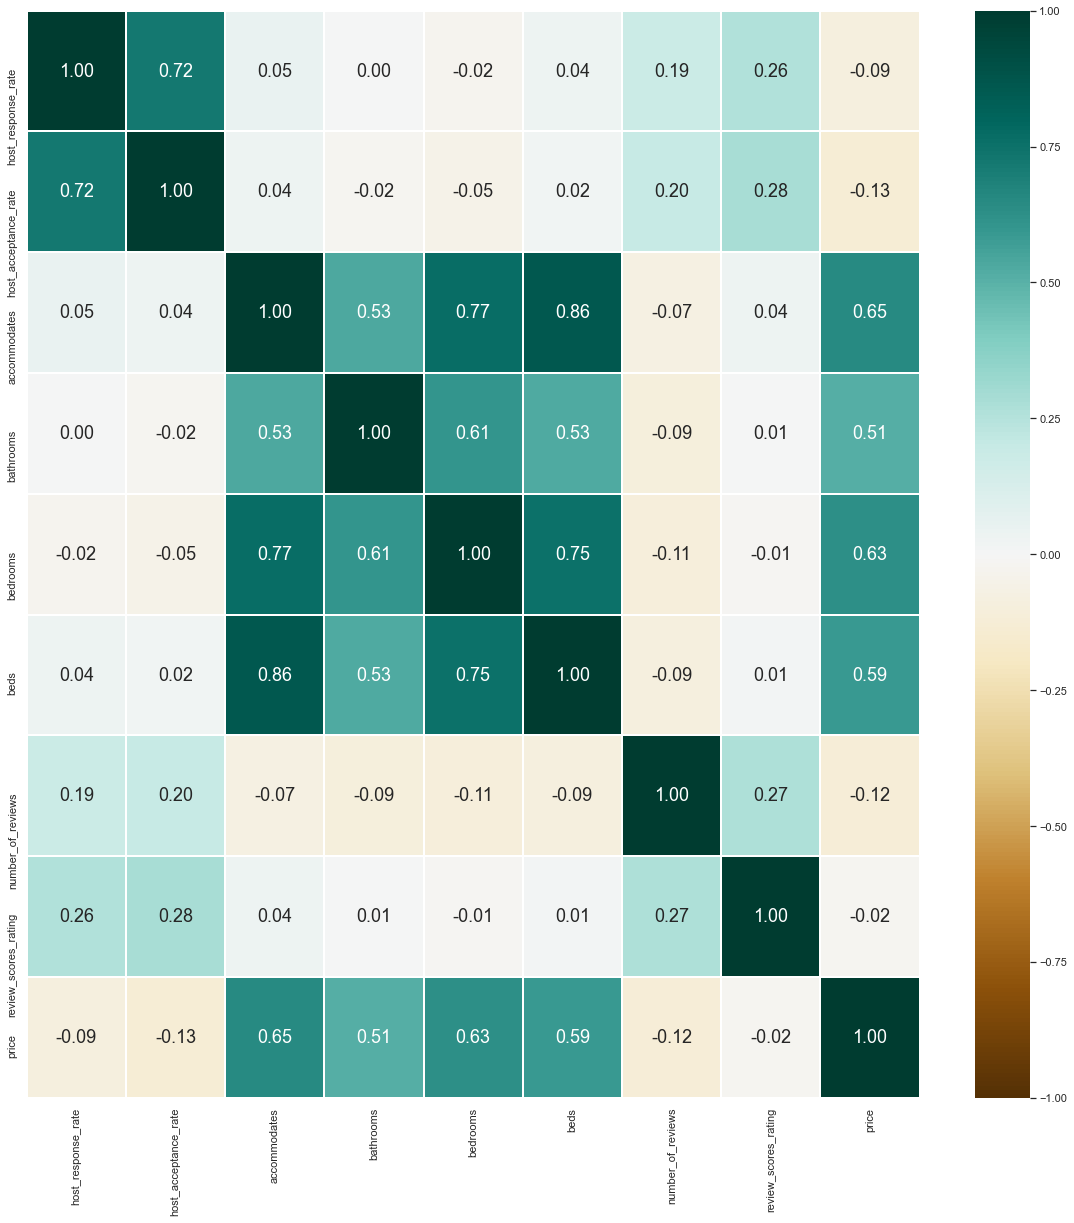

In [20]:
#Create a HeatMap
f,axes = plt.subplots(1,1, figsize=(20,20))
sb.heatmap(listingclean.corr(), vmin=-1, vmax=1, linewidths=1, annot=True, fmt=".2f", annot_kws={'size':18}, cmap="BrBG")

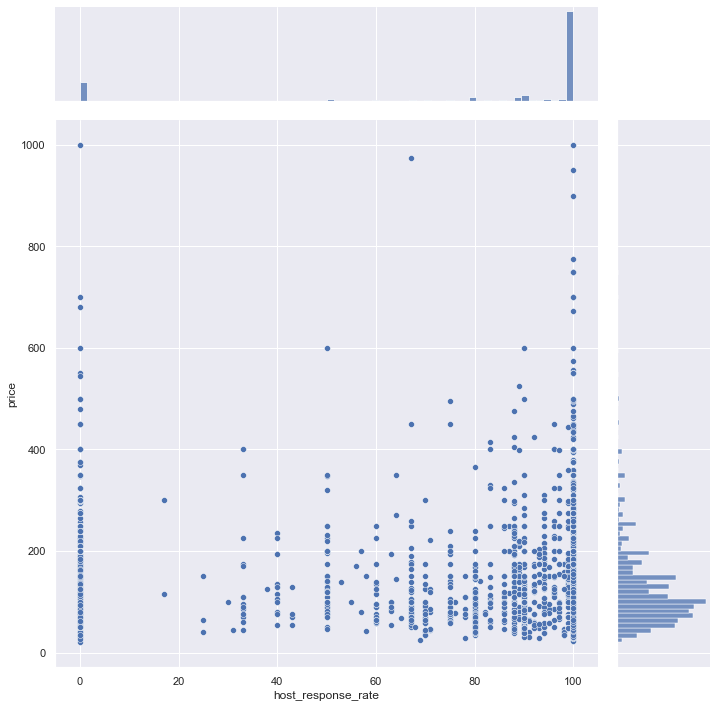

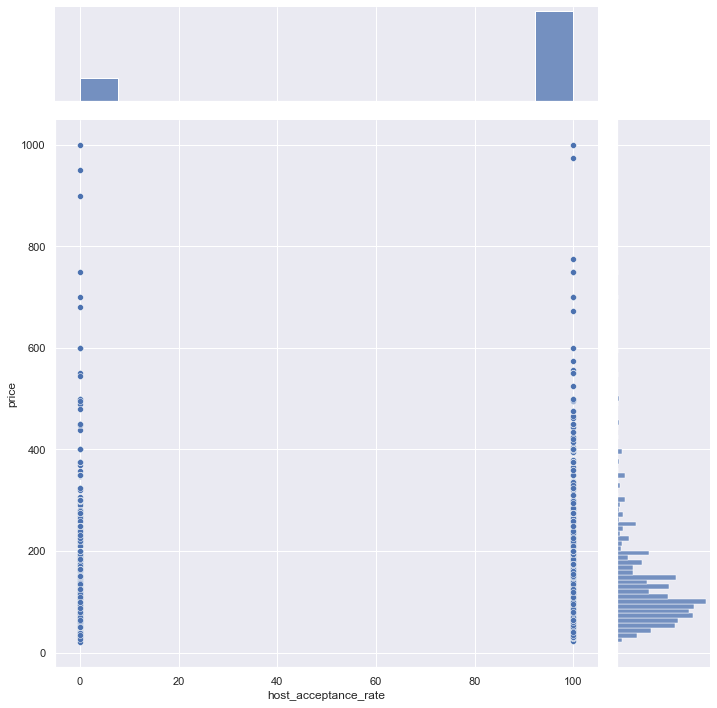

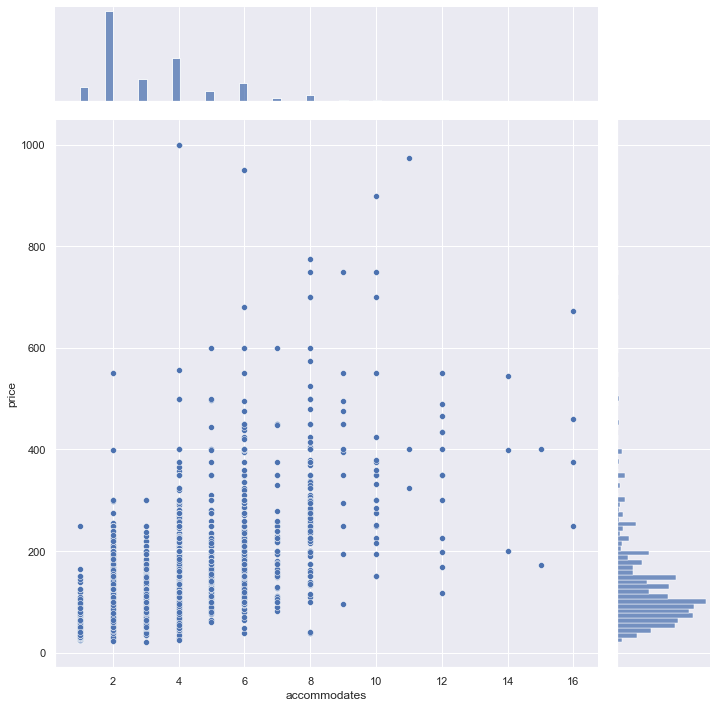

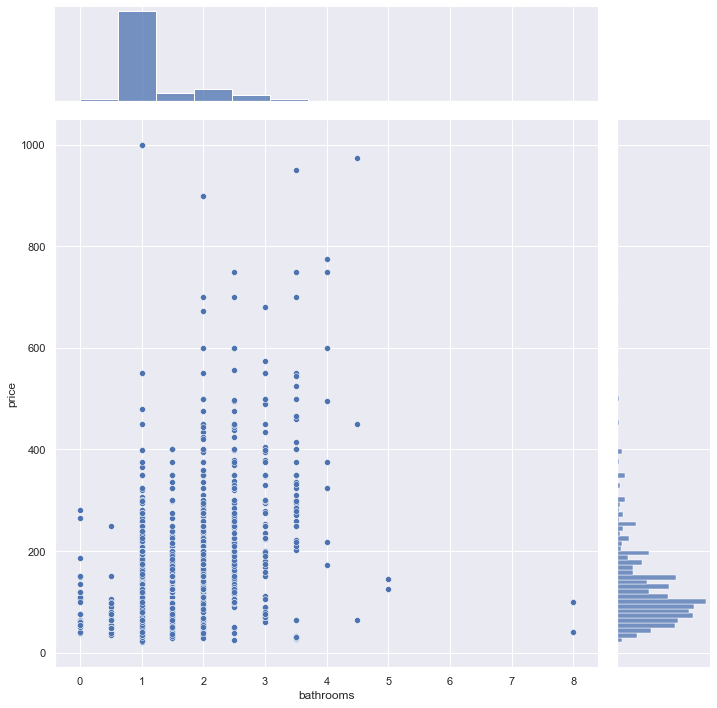

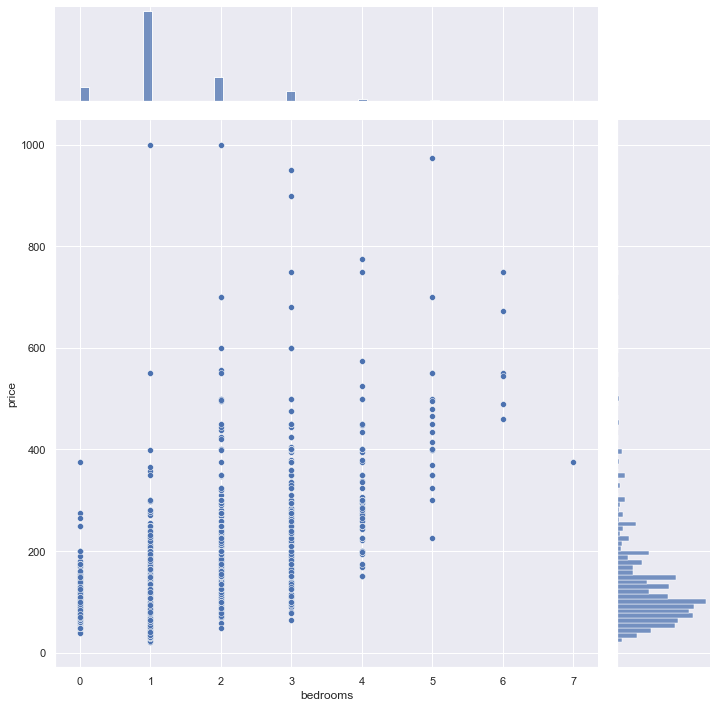

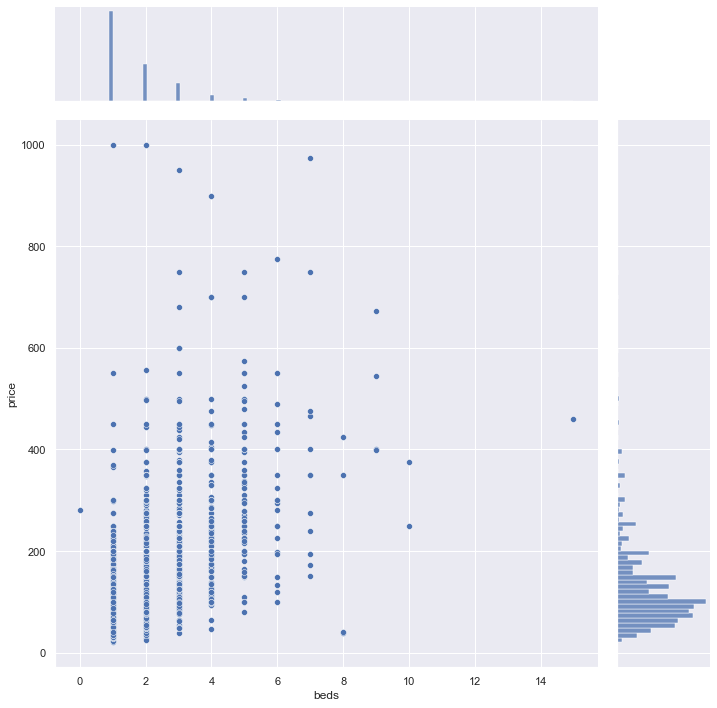

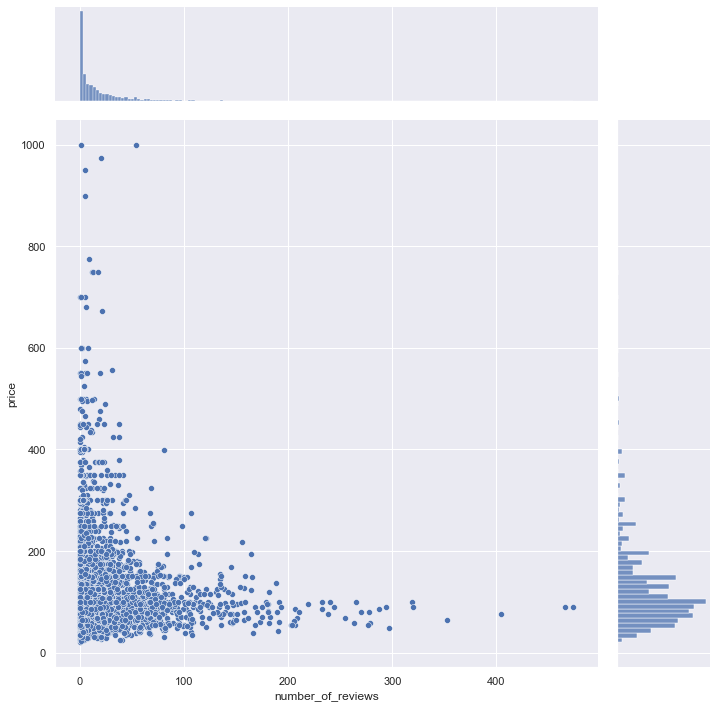

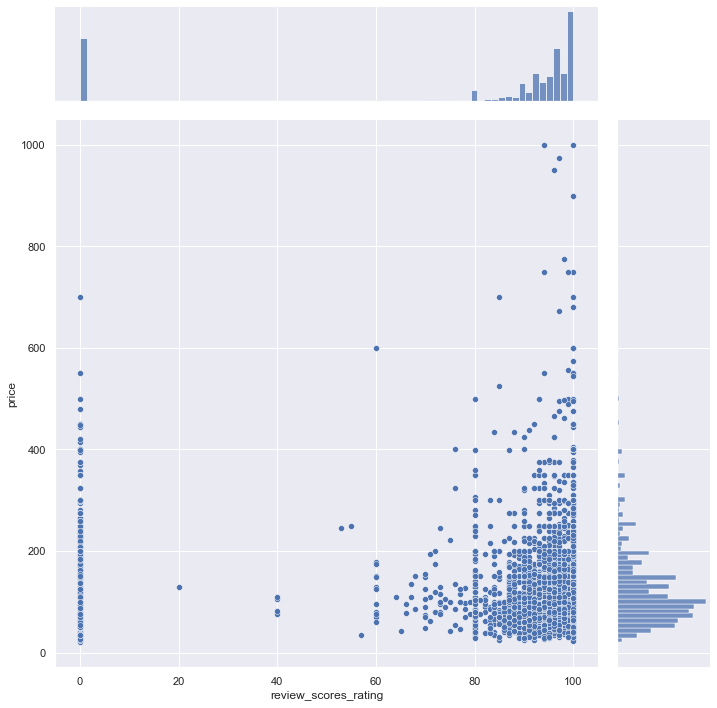

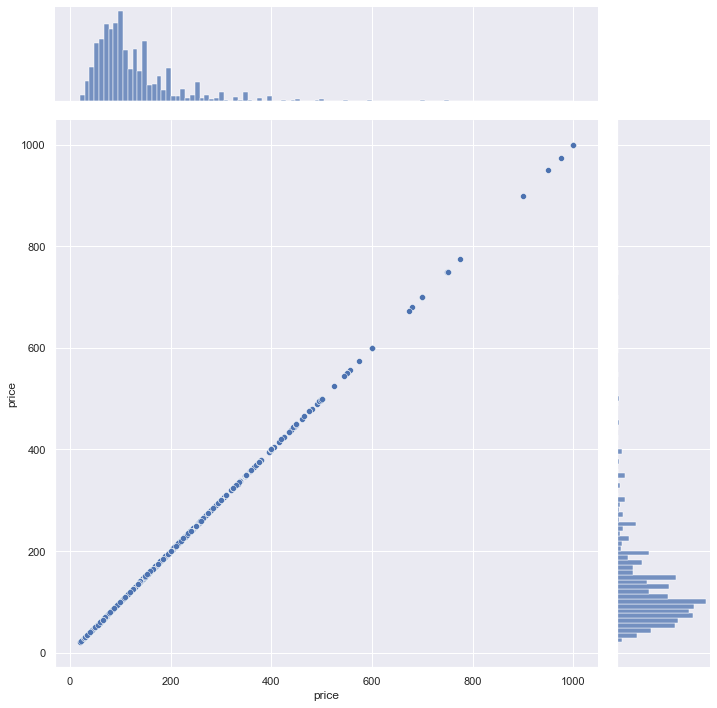

In [21]:
#Create JointPlot for each variable against price
for i in listingclean:
    sb.jointplot(data = listingclean, x = i, y = "price", height = 10)

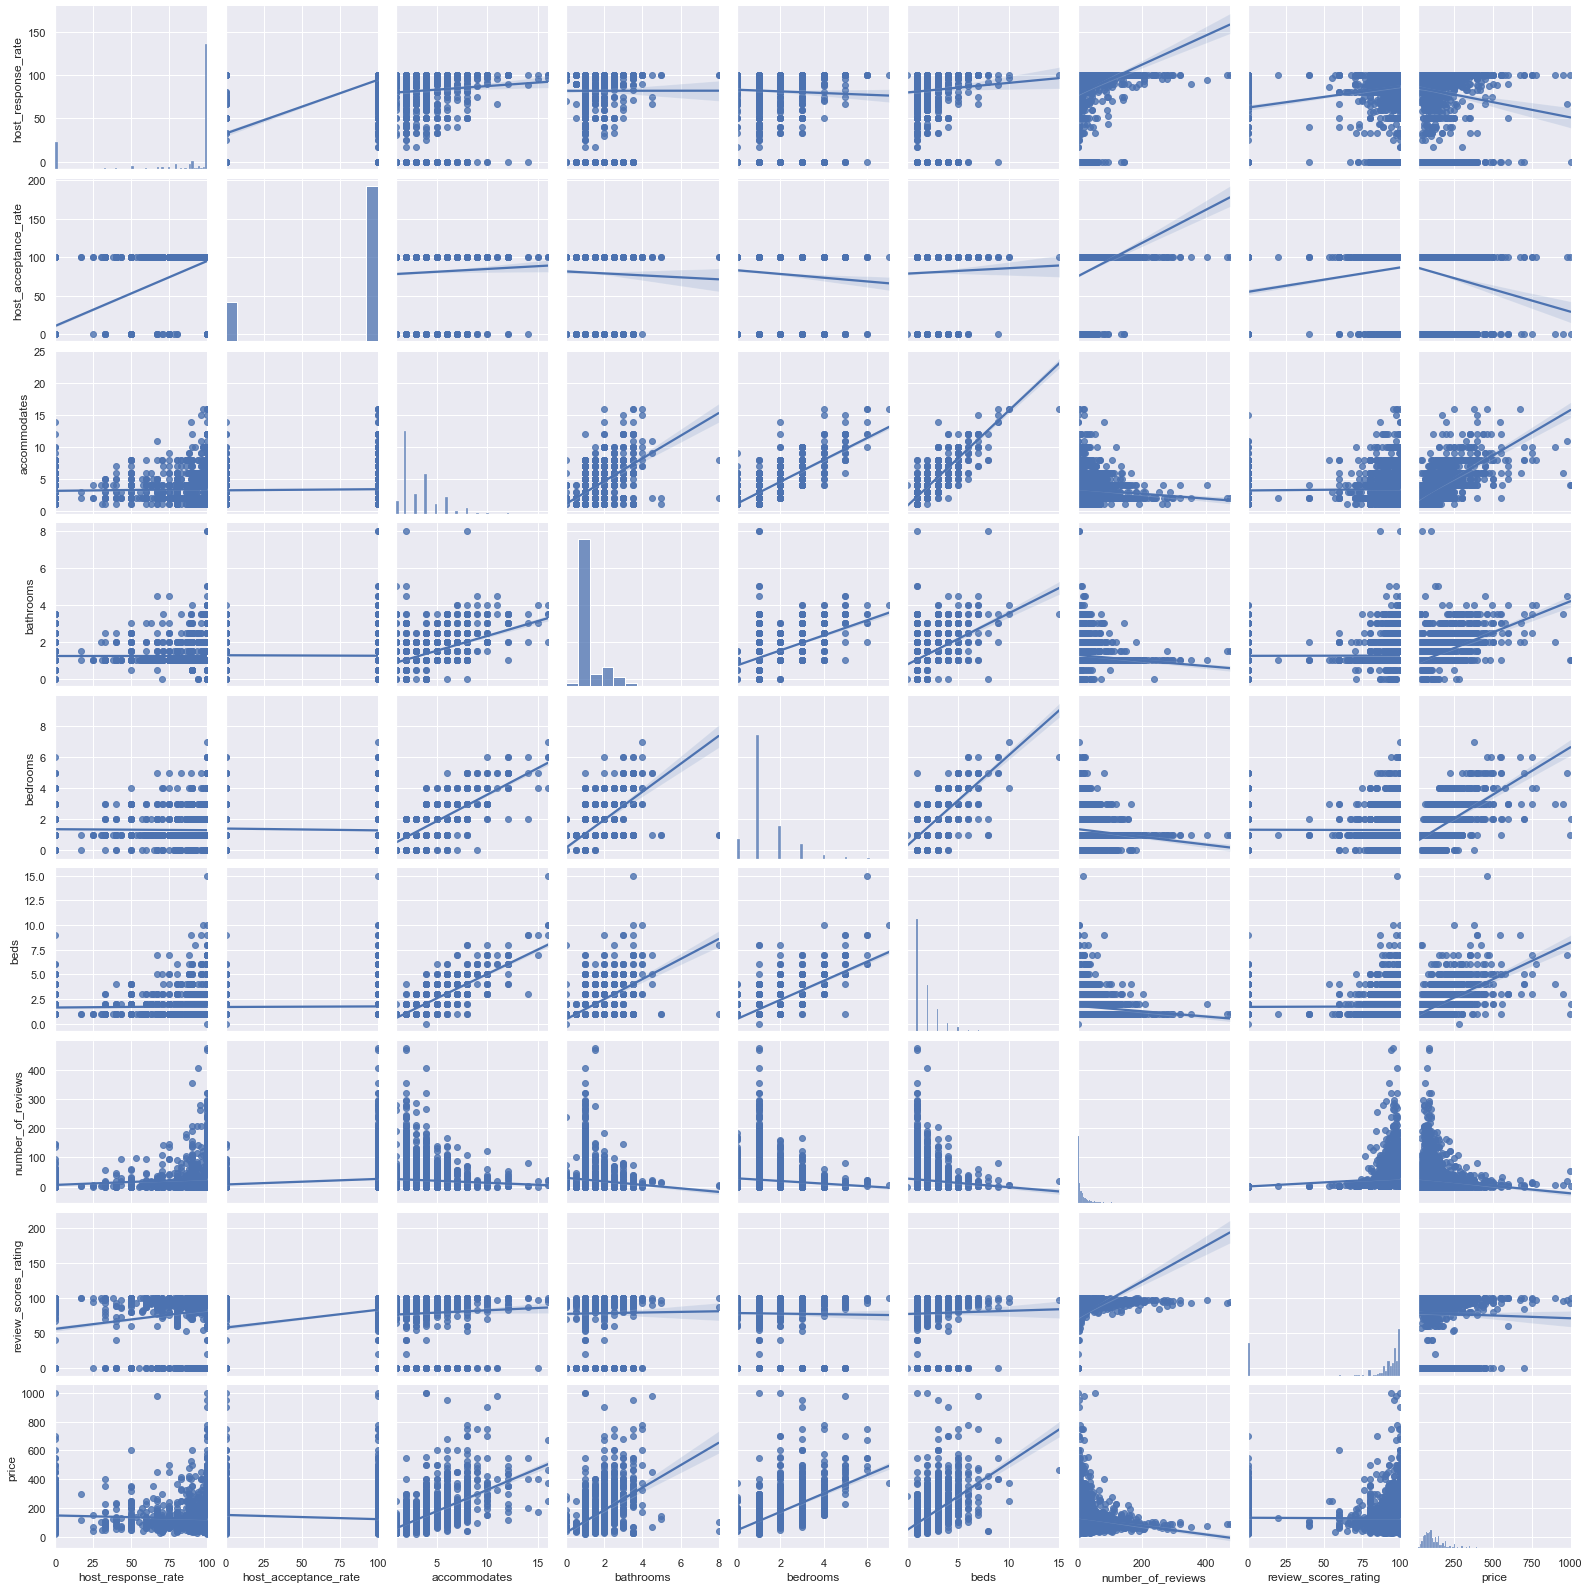

In [22]:
#Pairplot
sb.pairplot(data=listingclean, kind='reg')

# Part 3: Machine Learning : Linear Regression

Intercept of Regression 	: b =  [31.74696253]
Coefficients of Regression 	: a =  [[-0.04546289 -0.2871611  19.36762427 26.24050655 19.32374472 -0.47431371
  -0.08141291  0.04000697]]

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.49892338081132936
Mean Squared Error (MSE) 	: 4083.077796572392

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.5005124752312042
Mean Squared Error (MSE) 	: 4053.993054259578



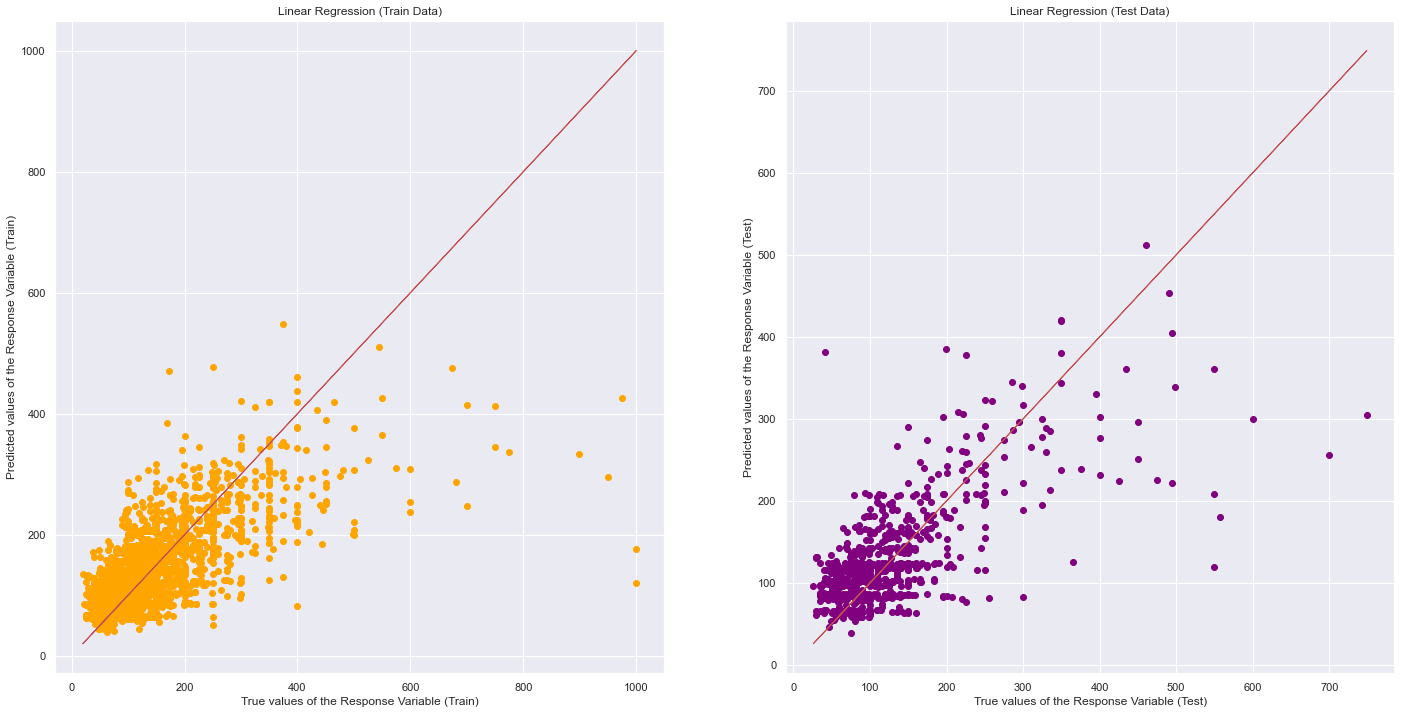

In [23]:
# Import essential models and functions from sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Recall the Houselayout-Price Dataset
Predictor = pd.DataFrame(listingclean[['host_response_rate','host_acceptance_rate',
'accommodates','bathrooms' , 'bedrooms', 'beds', 'number_of_reviews', 'review_scores_rating']])   # Predictor
Response = pd.DataFrame(listingclean['price'])       # Response

# Split the Dataset into Train and Test   # x always first 
X_train, X_test, y_train, y_test = train_test_split(Predictor, Response, test_size = 0.20, random_state=42)

# Linear Regression using Train Data
linreg = LinearRegression()         # create the linear regression object
linreg.fit(X_train, y_train)        # train the linear regression model

# Coefficients of the Linear Regression line
print('Intercept of Regression \t: b = ', linreg.intercept_)
print('Coefficients of Regression \t: a = ', linreg.coef_)
print()

# Predict Houselayout-Price
y_train_pred = linreg.predict(X_train)
y_test_pred = linreg.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print()

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, y_train_pred, color = "orange")
axes[0].plot(y_train, y_train, 'r-', linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[0].set_title("Linear Regression (Train Data)")
axes[1].scatter(y_test, y_test_pred, color = "purple")
axes[1].plot(y_test, y_test, 'r-', linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
axes[1].set_title("Linear Regression (Test Data)")
plt.show()

# Part 3: Machine Learning : Random Forest Regressor

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.5449659940002006
Mean Squared Error (MSE) 	: 3707.894512403099

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.005610865343417926
Mean Squared Error (MSE) 	: 8070.765425012308



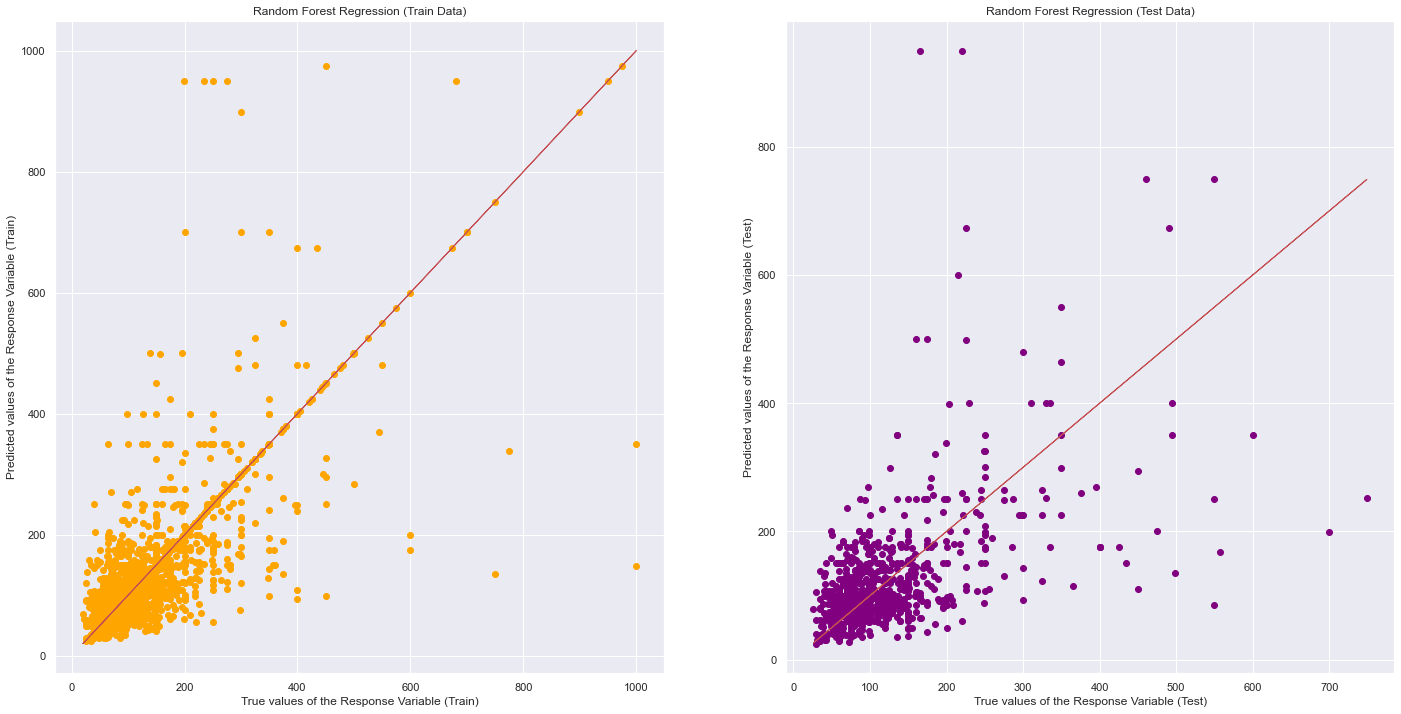

In [24]:
# Import Random Forest Regressor model from sckitlearn
from sklearn.ensemble import RandomForestRegressor

# Recall the Houselayout-Price Dataset
PredictorRF = pd.DataFrame(listingclean[['host_response_rate','host_acceptance_rate',
'accommodates','bathrooms', 'bedrooms', 'beds', 'number_of_reviews', 'review_scores_rating']])   # Predictor
ResponseRF = pd.DataFrame(listingclean['price'])       # Response

# Split the Dataset into Train and Test   # x always first 
X_train, X_test, y_train, y_test = train_test_split(PredictorRF, ResponseRF, test_size = 0.20, random_state=42)

 #create random forest regressor model        #n_estimators indicates number of trees
rf = RandomForestRegressor(n_estimators=1, random_state=42)   

# train the random forest regressor model #ravel.
rf.fit(X_train, y_train.values.ravel())  

# Predict Price values for Train and Test Dataset
y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", rf.score(X_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", rf.score(X_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print()

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, y_train_pred, color = "orange")
axes[0].plot(y_train, y_train, 'r-', linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[0].set_title("Random Forest Regression (Train Data)")
axes[1].scatter(y_test, y_test_pred, color = "purple")
axes[1].plot(y_test, y_test, 'r-', linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
axes[1].set_title("Random Forest Regression (Test Data)")
plt.show()

In [25]:
# Choosing the optimal "n_estimators"
from sklearn.model_selection import GridSearchCV

# Create the parameter grid based on the chosen intervals of n_estiamtors 
param_grid = {
  
    'n_estimators': [1,50, 100, 200, 300]
}

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf , param_grid = param_grid, cv = 3)

# Fit the grid search model
grid_search.fit(X_train, y_train.values.ravel())

grid_search.best_params_

{'n_estimators': 200}

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.8749849549871488
Mean Squared Error (MSE) 	: 1018.6988076912694

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.5034313294997081
Mean Squared Error (MSE) 	: 4030.3027430022785



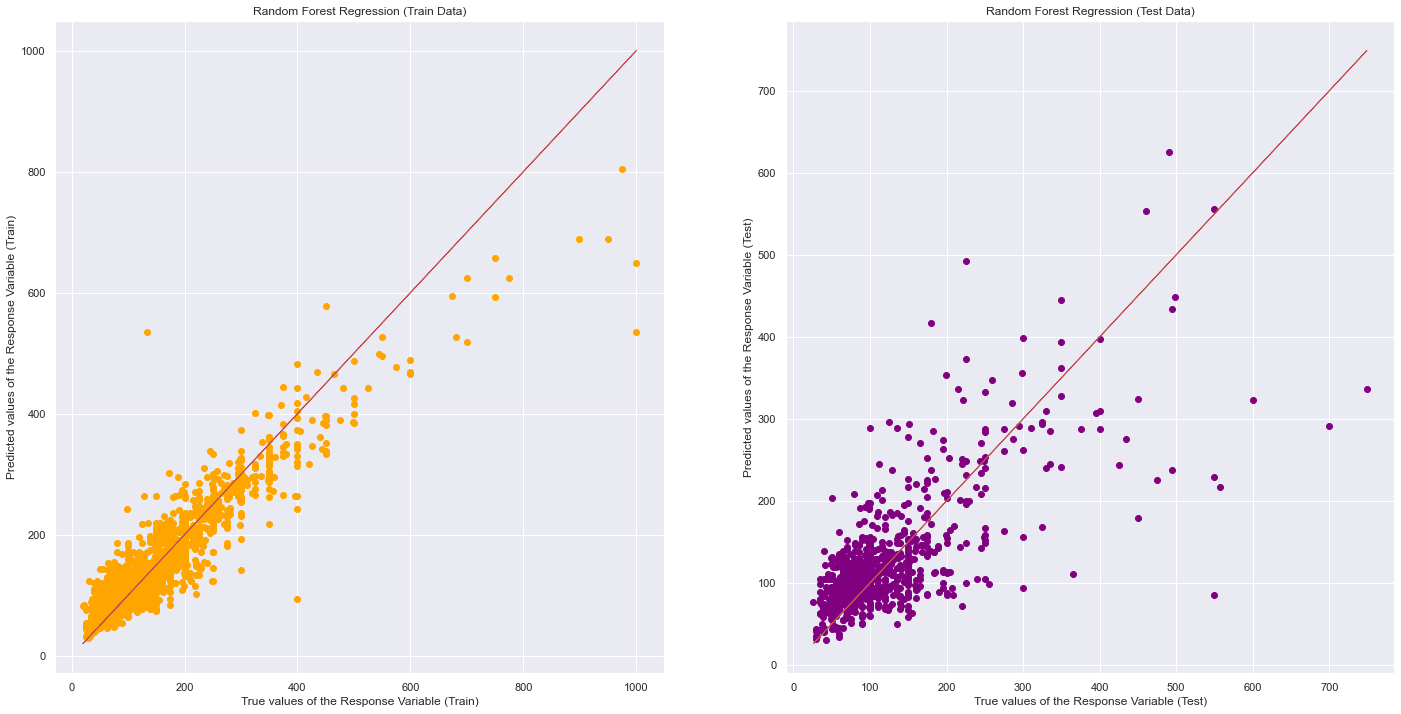

In [24]:
# Import Random Forest Regressor model from sckitlearn
from sklearn.ensemble import RandomForestRegressor

# Recall the Houselayout-Price Dataset
PredictorRF = pd.DataFrame(listingclean[['host_response_rate','host_acceptance_rate',
'accommodates','bathrooms', 'bedrooms', 'beds', 'number_of_reviews', 'review_scores_rating']])   # Predictor
ResponseRF = pd.DataFrame(listingclean['price'])       # Response

# Split the Dataset into Train and Test   # x always first 
X_train, X_test, y_train, y_test = train_test_split(PredictorRF, ResponseRF, test_size = 0.20, random_state=42)

 #create random forest regressor model        #n_estimators indicates number of trees(optimal=200)
rf = RandomForestRegressor(n_estimators=200, random_state=42)   

# train the random forest regressor model #ravel.
rf.fit(X_train, y_train.values.ravel())  

# Predict Price values for Train and Test Dataset
y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", rf.score(X_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", rf.score(X_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print()

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, y_train_pred, color = "orange")
axes[0].plot(y_train, y_train, 'r-', linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[0].set_title("Random Forest Regression (Train Data)")
axes[1].scatter(y_test, y_test_pred, color = "purple")
axes[1].plot(y_test, y_test, 'r-', linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
axes[1].set_title("Random Forest Regression (Test Data)")
plt.show()

In [25]:
#feature the importance of the variables(predictors) 
feature_importances = pd.DataFrame(rf.feature_importances_, 
                                   index = X_train.columns, columns=['Importance Score']).sort_values('Importance Score', ascending=True)

feature_importances

,Importance Score
host_acceptance_rate,0.032246
beds,0.041592
host_response_rate,0.060675
review_scores_rating,0.073000
bathrooms,0.110352
number_of_reviews,0.127059
accommodates,0.138530
bedrooms,0.416546


<AxesSubplot:>

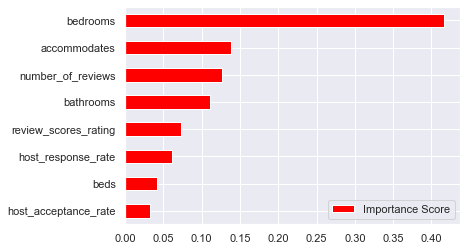

In [26]:
#plot importance graph
feature_importances.plot(kind='barh', color='red')

# PART 3: Machine Learning: Ridge Regression

In [28]:
# Import Ridge Regression
from sklearn.linear_model import Ridge

In [50]:
# Separate Predictor and response
# Predictors
RidgePredictor = pd.DataFrame(listingclean[['host_response_rate','host_acceptance_rate',
'accommodates','bathrooms', 'bedrooms', 'beds', 'number_of_reviews', 'review_scores_rating']])
#Response
RidgeResponse = pd.DataFrame(listingclean['price'])

# Split the Dataset into Train and Test   # x always first 
X_train, X_test, y_train, y_test = train_test_split(RidgePredictor, RidgeResponse, test_size = 0.20)

In [55]:
#Ridge Regression
ridge = Ridge(alpha=100)
ridge.fit(X_train,y_train)

R_train_pred = ridge.predict(X_train)
R_test_pred = ridge.predict(X_test)

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.4988016462898136
Mean Squared Error (MSE) 	: 3959.359225000321

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.4986162169053274
Mean Squared Error (MSE) 	: 4564.080733605966



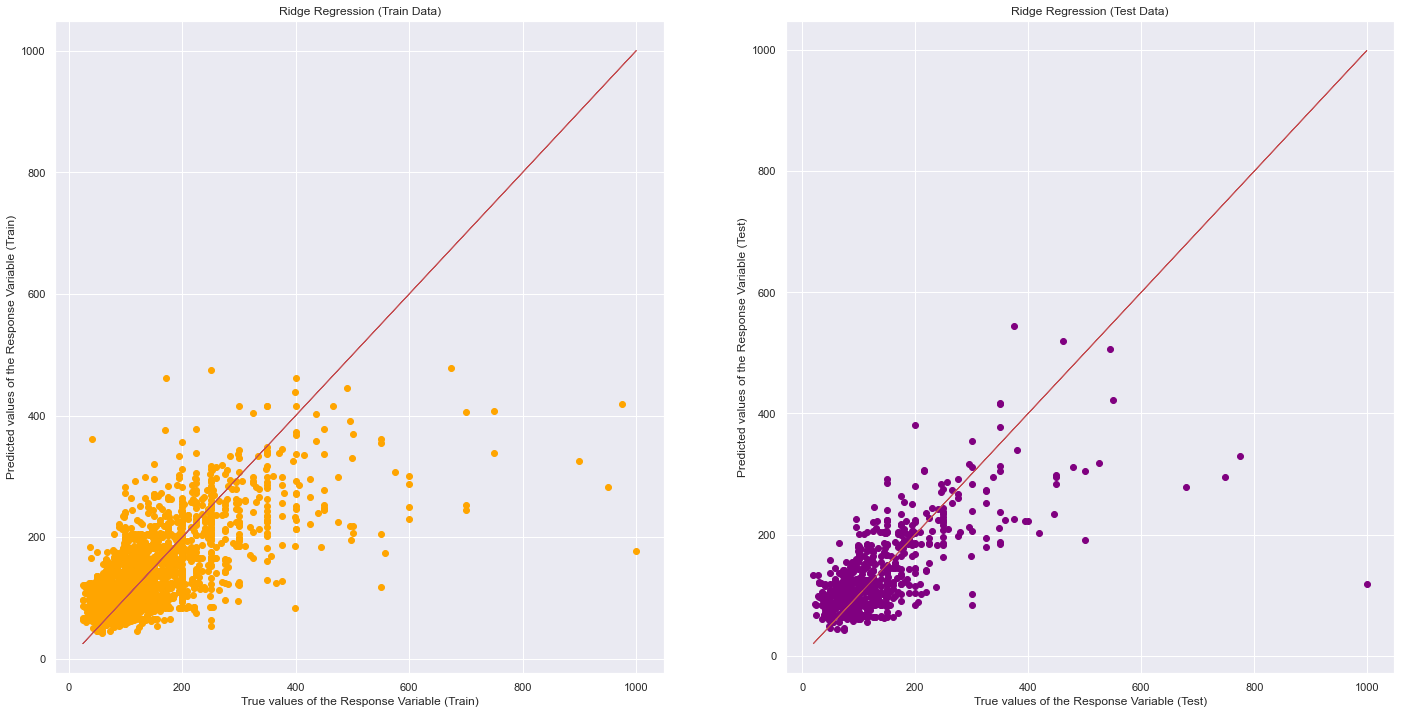

In [56]:
# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", ridge.score(X_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, R_train_pred))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", ridge.score(X_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, R_test_pred))
print()

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, R_train_pred, color = "orange")
axes[0].plot(y_train, y_train, 'r-', linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[0].set_title("Ridge Regression (Train Data)")
axes[1].scatter(y_test, R_test_pred, color = "purple")
axes[1].plot(y_test, y_test, 'r-', linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
axes[1].set_title("Ridge Regression (Test Data)")
plt.show()

## Optimization

The Ridge Regression model can be slightly improve by selecting a lower alpha value. The lower the alpha value, the more complex the model will be.

In [57]:
ridge2 = Ridge(alpha=0.001)
ridge2.fit(X_train,y_train)

R2_train_pred = ridge2.predict(X_train)
R2_test_pred = ridge2.predict(X_test)

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.49909672947715966
Mean Squared Error (MSE) 	: 3957.02813127004

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.5000182880963369
Mean Squared Error (MSE) 	: 4551.317723860152



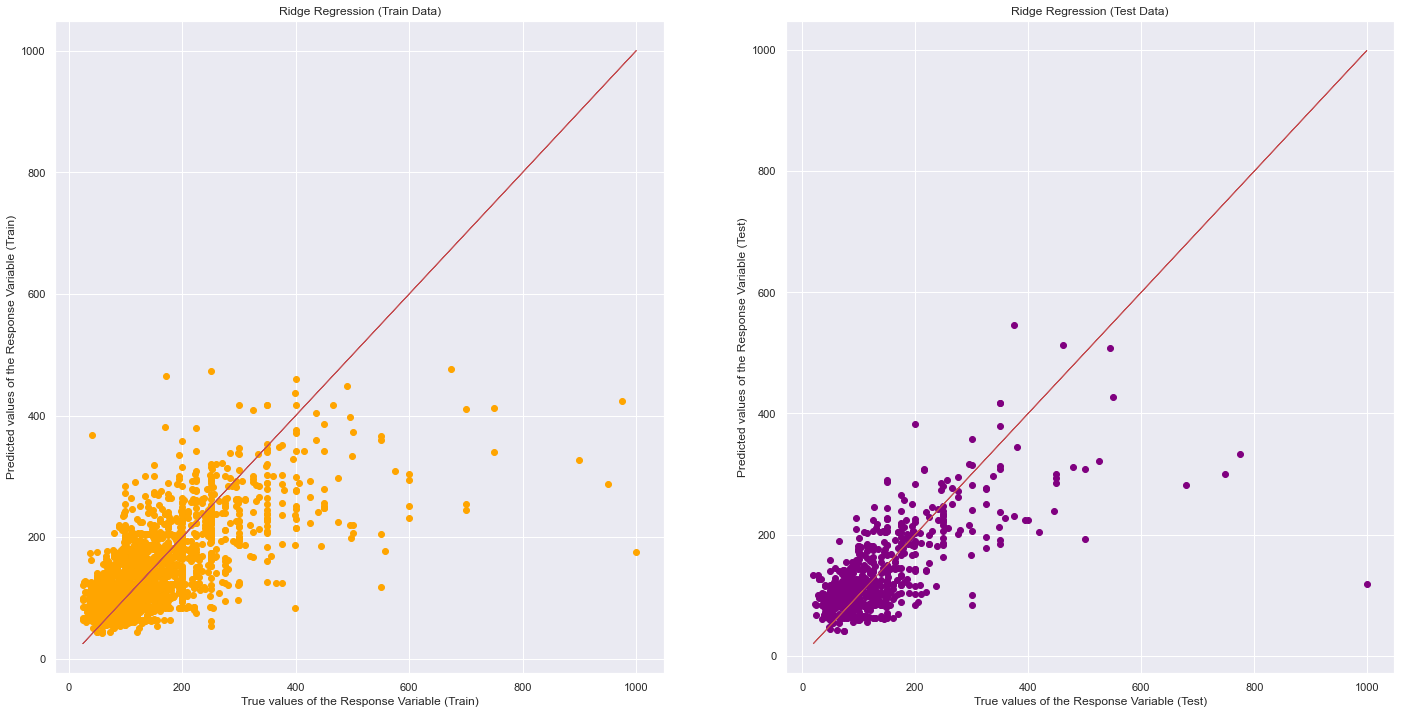

In [59]:
# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", ridge2.score(X_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, R2_train_pred))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", ridge2.score(X_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, R2_test_pred))
print()

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, R2_train_pred, color = "orange")
axes[0].plot(y_train, y_train, 'r-', linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[0].set_title("Ridge Regression (Train Data)")
axes[1].scatter(y_test, R2_test_pred, color = "purple")
axes[1].plot(y_test, y_test, 'r-', linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
axes[1].set_title("Ridge Regression (Test Data)")
plt.show()